# Probability Adjustment Formula Derivation

Consider a sample $\mathrm{X}$ with labels $\mathrm{Y}$.

$$\begin{array}{ll}
P(Y=1)=p & \textrm{Probability of a purchase }(\approx0.02) \\
P(X=t) &  \textrm{Probability of a customer-product pair having features } t \\
P(X=t \mid Y=1) = f_1(t) & \textrm{Conditional probability of X in class 1} 
\end{array}$$

Our model learns the probability a sample's class is 1 given its features. Using Bayes' Theorem:

$$\begin{array}{ll}
P(Y=1 \mid X=t) &= \dfrac{P(Y=1) \times P(X=t \mid Y=1)}{P(X=t)} \\[15pt]
&= \dfrac{p  f_1(t)}{pf_1(t) + (1-p)f_0(t)} \\[15pt]
&= \dfrac{1}{1+\dfrac{1-p}{p} \dfrac{f_0}{f_1}}
\end{array}$$

We now artificially change the class counts in the data by oversampling, using the proportions $q$ and $1-q$ for the two classes. In our case $q=0.5$

$$P(Y=1 \mid X=t) = \dfrac{1}{1+\dfrac{1-q}{q} \dfrac{f_0}{f_1}}$$

Which can be rearranged to:

$$\dfrac{f_0}{f_1} = \left ( \dfrac{1}{P(Y=1 \mid X=t)} - 1 \right ) \dfrac{q}{1-q} $$

Where $P(Y=1 \mid X=t)$ are the outputs of our model - the predicted probabilities learnt from the balanced resampled dataset. We can substitute this in to the earlier equation to find the true conditional probabilities for the imbalanced dataset. Let $\hat{y}$ be our model's predictions and $y_{\textrm{adjust}}$ be the calibrated probabilities.

$$\begin{array}{ll}
\dfrac{f_0}{f_1} &= \left ( \dfrac{1}{\hat{y}} - 1 \right ) \dfrac{q}{1-q} \\[15pt]
y_{\textrm{adjust}} &= \dfrac{1}{1+\dfrac{1-p}{p} \left ( \dfrac{1}{\hat{y}} - 1 \right )\dfrac{q}{1-q}} \\[15pt]
&= \dfrac{1}{1+\dfrac{1-p}{1-q} \dfrac{q}{q} \dfrac{1-\hat{y}}{\hat{y}} } \\[15pt]
y_{\textrm{adjust}} &= \dfrac{ \dfrac{\hat{y}}{\frac{q}{p}} } { \dfrac{\hat{y}}{\frac{q}{p}} +\dfrac{1-\hat{y}}{\frac{1-q}{1-p}} } = \dfrac{a}{a+b}
\end{array}$$

Using this formula we can adjust the predicted probabilities from our model to reflect the true class distribution.

In [2]:
# hence the classadjust function:
def classadjust(y_hat, q, p):
    
    a = y_hat/(q/p)
    
    b = (1-y_hat) / ( (1-q) / (1-p) )
    
    return a/(a+b)

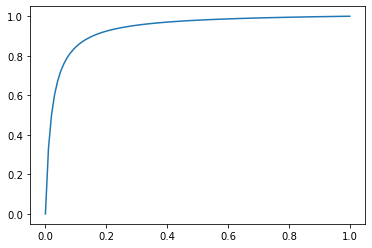

In [9]:
import matplotlib.pyplot as plt
import numpy as np

p = 0.02
q = 0.5

x = np.linspace(0,1,100)
y = classadjust(x, p, q)

plt.plot(x,y)
plt.show()
plt.close()

In [ ]:
# class adust is a function of the form

(x/a)/(x/a + c - x/b)

# or more simply
x/(ax + b)

# differentiating wrt x
d/dx (u/v) = (v du/dx - u dv/dx) / v*v

= (ax + b - ax) / (ax+b)^2
= b/(ax+b)^2

# no turning points regardless of choice of a,b

b = 1/((1-q)/(1-p))

# which is always positive so function is strictly increasing